In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./new0/new2.csv')


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      156 non-null    int64 
 1   Q2      156 non-null    int64 
 2   Q3      156 non-null    int64 
 3   Q4      156 non-null    int64 
 4   Q5      156 non-null    int64 
 5   Q6      156 non-null    int64 
 6   Q7      156 non-null    int64 
 7   Q8      156 non-null    int64 
 8   Q9      156 non-null    int64 
 9   Q10     156 non-null    int64 
 10  Class   156 non-null    object
dtypes: int64(10), object(1)
memory usage: 13.5+ KB


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      156 non-null    int64 
 1   Q2      156 non-null    int64 
 2   Q3      156 non-null    int64 
 3   Q4      156 non-null    int64 
 4   Q5      156 non-null    int64 
 5   Q6      156 non-null    int64 
 6   Q7      156 non-null    int64 
 7   Q8      156 non-null    int64 
 8   Q9      156 non-null    int64 
 9   Q10     156 non-null    int64 
 10  Class   156 non-null    object
dtypes: int64(10), object(1)
memory usage: 13.5+ KB


In [53]:
df = df.dropna()


In [2]:
df = df[df['Class'].isin(['Poetry','History','Biography','Comic'])]
df['Class'].values

array(['Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Biography', 'Biography', 'Biography', 'Biography', 'Biography',
       'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry',
       'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry',
       'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry',
       'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry',
       'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry', 'Poetry',
       'Poetry', 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
X = df.drop(columns=['Class'])
y = df['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred = knn.predict(X_test)
print(y_pred)

['Comic' 'Poetry' 'Poetry' 'Poetry' 'History' 'Biography' 'Comic'
 'History' 'Comic' 'Comic' 'Biography' 'Comic' 'Biography' 'History'
 'Biography' 'Biography' 'History' 'Comic' 'Comic' 'Poetry' 'Comic'
 'Biography' 'Biography' 'Biography' 'Biography' 'Comic' 'Poetry' 'Poetry'
 'Poetry' 'Comic' 'Poetry' 'Comic' 'Poetry' 'Comic' 'History' 'History'
 'History' 'Poetry' 'Biography' 'Biography' 'History' 'Poetry' 'History'
 'Biography' 'Poetry' 'Biography' 'History']


In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [13]:
# Split the data into training and testing sets

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate KNN model
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Train SVM model
svm_model = SVC(kernel='linear',decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM model
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
# print("Logistic Regression Accuracy:", lr_accuracy)



Random Forest Accuracy: 0.9411764705882353
KNN Accuracy: 0.9411764705882353
SVM Accuracy: 0.9117647058823529


In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PCA instance
pca = PCA(n_components=8, random_state=42)

# Create pipelines for each classifier with PCA and the classifier
rf_pipeline = Pipeline([('pca', pca), ('rf', RandomForestClassifier(n_estimators=400 ,random_state=42))])
knn_pipeline = Pipeline([('pca', pca), ('knn', KNeighborsClassifier())])
svm_pipeline = Pipeline([('pca', pca), ('svm', SVC(kernel='linear',decision_function_shape='ovr'))])
lr_pipeline = Pipeline([('pca', pca), ('lr', LogisticRegression(max_iter=1000))])

# Train Random Forest model with PCA
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate Random Forest model with PCA
rf_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy with PCA:", rf_accuracy)

# Train KNN model with PCA
knn_pipeline.fit(X_train, y_train)

# Predict and evaluate KNN model with PCA
knn_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy with PCA:", knn_accuracy)

# Train SVM model with PCA
svm_pipeline.fit(X_train, y_train)

# Predict and evaluate SVM model with PCA
svm_pred = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
# print("SVM Accuracy with PCA:", svm_accuracy)

# Train Logistic Regression model with PCA
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model with PCA
lr_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy with PCA:", lr_accuracy)



Random Forest Accuracy with PCA: 0.9705882352941176
KNN Accuracy with PCA: 0.9705882352941176
Logistic Regression Accuracy with PCA: 0.9117647058823529


Random Forest - Maximum Accuracy Number of Components: 1 - Accuracy: 1.0
KNN - Maximum Accuracy Number of Components: 3 - Accuracy: 0.9705882352941176
SVM - Maximum Accuracy Number of Components: 6 - Accuracy: 0.9411764705882353
Logistic Regression - Maximum Accuracy Number of Components: 7 - Accuracy: 0.9117647058823529


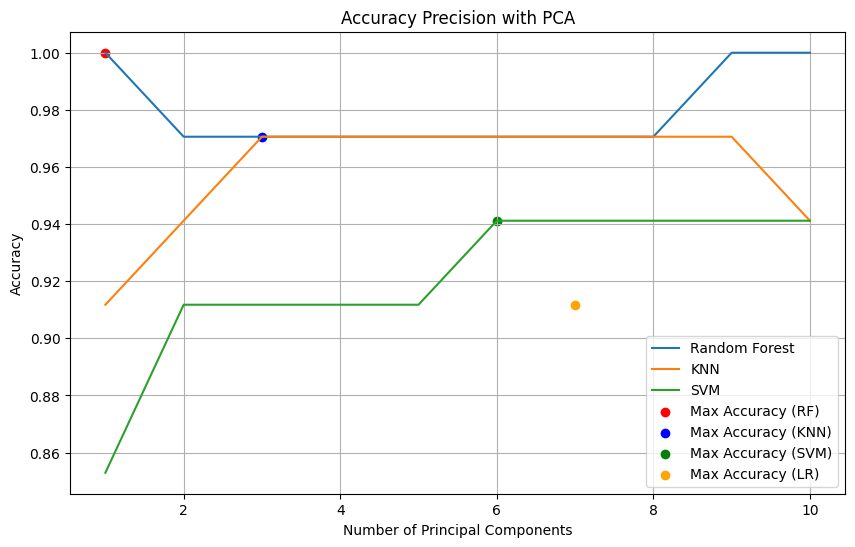

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Define a range of number of principal components to test
n_components_range = np.arange(1, X.shape[1]+1)

# Initialize lists to store accuracies for each model
rf_accuracies = []
knn_accuracies = []
svm_accuracies = []
lr_accuracies = []

# Iterate over the range of number of principal components
for n_components in n_components_range:
    # Create PCA instances with varying number of components
    pca = PCA(n_components=n_components, random_state=42)
    
    # Create pipelines for each classifier with PCA and the classifier
    rf_pipeline = Pipeline([('pca', pca), ('rf', RandomForestClassifier(random_state=42))])
    knn_pipeline = Pipeline([('pca', pca), ('knn', KNeighborsClassifier())])
    svm_pipeline = Pipeline([('pca', pca), ('svm', SVC(random_state=42))])
    lr_pipeline = Pipeline([('pca', pca), ('lr', LogisticRegression(max_iter=1000))])
    
    # Train Random Forest model with PCA
    rf_pipeline.fit(X_train, y_train)
    # Predict and evaluate Random Forest model with PCA
    rf_accuracy = accuracy_score(y_test, rf_pipeline.predict(X_test))
    rf_accuracies.append(rf_accuracy)
    
    # Train KNN model with PCA
    knn_pipeline.fit(X_train, y_train)
    # Predict and evaluate KNN model with PCA
    knn_accuracy = accuracy_score(y_test, knn_pipeline.predict(X_test))
    knn_accuracies.append(knn_accuracy)
    
    # Train SVM model with PCA
    svm_pipeline.fit(X_train, y_train)
    # Predict and evaluate SVM model with PCA
    svm_accuracy = accuracy_score(y_test, svm_pipeline.predict(X_test))
    svm_accuracies.append(svm_accuracy)

    # Train Logistic Regression model with PCA
    lr_pipeline.fit(X_train, y_train)

    # Predict and evaluate Logistic Regression model with PCA
    lr_accuracy = accuracy_score(y_test, lr_pipeline.predict(X_test))
    lr_accuracies.append(lr_accuracy)


# Find the number of principal components with maximum accuracy for each classifier
rf_max_accuracy_n_components = n_components_range[np.argmax(rf_accuracies)]
knn_max_accuracy_n_components = n_components_range[np.argmax(knn_accuracies)]
svm_max_accuracy_n_components = n_components_range[np.argmax(svm_accuracies)]
lr_max_accuracy_n_components = n_components_range[np.argmax(lr_accuracies)]

# Find the maximum accuracy for each classifier
rf_max_accuracy = max(rf_accuracies)
knn_max_accuracy = max(knn_accuracies)
svm_max_accuracy = max(svm_accuracies)
lr_max_accuracy = max(lr_accuracies)

print("Random Forest - Maximum Accuracy Number of Components:", rf_max_accuracy_n_components, "- Accuracy:", rf_max_accuracy)
print("KNN - Maximum Accuracy Number of Components:", knn_max_accuracy_n_components, "- Accuracy:", knn_max_accuracy)
print("SVM - Maximum Accuracy Number of Components:", svm_max_accuracy_n_components, "- Accuracy:", svm_max_accuracy)
print("Logistic Regression - Maximum Accuracy Number of Components:", lr_max_accuracy_n_components, "- Accuracy:", lr_max_accuracy)

# Plot the accuracy precision graph
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, rf_accuracies, label='Random Forest')
plt.plot(n_components_range, knn_accuracies, label='KNN')
plt.plot(n_components_range, svm_accuracies, label='SVM')
plt.scatter(rf_max_accuracy_n_components, rf_max_accuracy, color='red', label='Max Accuracy (RF)')
plt.scatter(knn_max_accuracy_n_components, knn_max_accuracy, color='blue', label='Max Accuracy (KNN)')
plt.scatter(svm_max_accuracy_n_components, svm_max_accuracy, color='green', label='Max Accuracy (SVM)')
plt.scatter(lr_max_accuracy_n_components, lr_max_accuracy, color='orange', label='Max Accuracy (LR)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy Precision with PCA')
plt.legend()
plt.grid(True)
plt.show()

Random Forest - Maximum Accuracy: 1.0 with 10 features
KNN - Maximum Accuracy: 0.9705882352941176 with 8 features
SVM - Maximum Accuracy: 0.9411764705882353 with 10 features


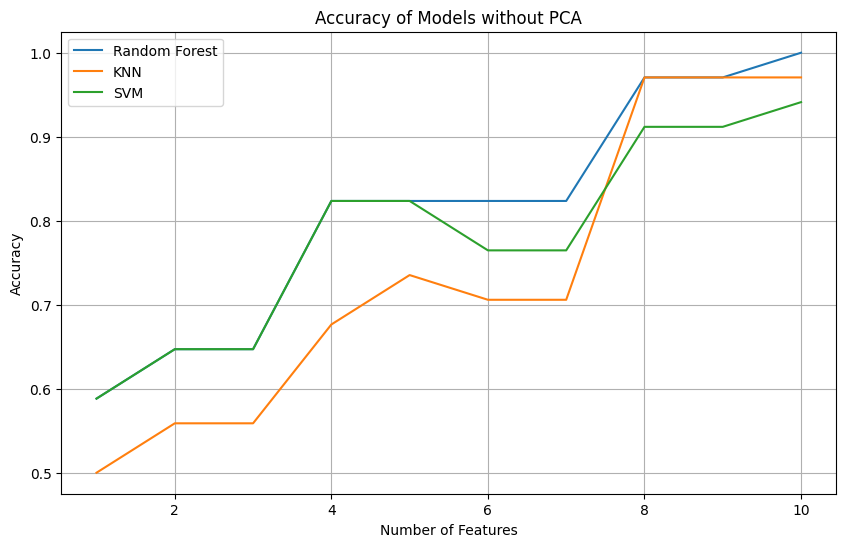

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a range of number of features to test
n_features_range = np.arange(1, X.shape[1]+1)

# Initialize lists to store accuracies for each model
rf_accuracies = []
knn_accuracies = []
svm_accuracies = []
lr_accuracies = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the range of number of features
for n_features in n_features_range:
    # Select the first n_features features
    X_train_features = X_train.iloc[:, :n_features]
    X_test_features = X_test.iloc[:, :n_features]
    
    # Initialize and train Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_features, y_train)
    
    # Predict and evaluate Random Forest model
    rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test_features))
    rf_accuracies.append(rf_accuracy)
    
    # Initialize and train KNN model
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_features, y_train)
    
    # Predict and evaluate KNN model
    knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_features))
    knn_accuracies.append(knn_accuracy)
    
    # Initialize and train SVM model
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_features, y_train)
    
    # Predict and evaluate SVM model
    svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_features))
    svm_accuracies.append(svm_accuracy)

    # Initialize and train Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_features, y_train)

    # Predict and evaluate Logistic Regression model
    lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test_features))
    lr_accuracies.append(lr_accuracy)

# Find the maximum accuracy for each model
rf_max_accuracy = max(rf_accuracies)
knn_max_accuracy = max(knn_accuracies)
svm_max_accuracy = max(svm_accuracies)
lr_max_accuracy = max(lr_accuracies)

# Find the corresponding number of features for maximum accuracy
rf_max_accuracy_n_features = n_features_range[np.argmax(rf_accuracies)]
knn_max_accuracy_n_features = n_features_range[np.argmax(knn_accuracies)]
svm_max_accuracy_n_features = n_features_range[np.argmax(svm_accuracies)]
lr_max_accuracy_n_features = n_features_range[np.argmax(lr_accuracies)]

print("Random Forest - Maximum Accuracy:", rf_max_accuracy, "with", rf_max_accuracy_n_features, "features")
print("KNN - Maximum Accuracy:", knn_max_accuracy, "with", knn_max_accuracy_n_features, "features")
print("SVM - Maximum Accuracy:", svm_max_accuracy, "with", svm_max_accuracy_n_features, "features")
# print("Logistic Regression - Maximum Accuracy:", lr_max_accuracy, "with", lr_max_accuracy_n_features, "features")

# Plot the accuracy graph for all models without PCA
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, rf_accuracies, label='Random Forest')
plt.plot(n_features_range, knn_accuracies, label='KNN')
plt.plot(n_features_range, svm_accuracies, label='SVM')
# plt.plot(n_features_range, lr_accuracies, label='Logistic Regression')
# plt.scatter(rf_max_accuracy_n_features, rf_max_accuracy, color='red', label=f'Max Accuracy (RF): {rf_max_accuracy:.2f}')
# plt.scatter(knn_max_accuracy_n_features, knn_max_accuracy, color='blue', label=f'Max Accuracy (KNN): {knn_max_accuracy:.2f}')
# plt.scatter(svm_max_accuracy_n_features, svm_max_accuracy, color='green', label=f'Max Accuracy (SVM): {svm_max_accuracy:.2f}')
# plt.scatter(lr_max_accuracy_n_features, lr_max_accuracy, color='orange', label=f'Max Accuracy (LR): {lr_max_accuracy:.2f}')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models without PCA')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import pickle

# Save the KNN model to a pickle file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)


In [10]:
import pandas as pd
import pickle

with open('book.pkl','wb') as file:
    books = pd.read_csv('book.csv')

    pickle.dump(books, file)